<a href="https://colab.research.google.com/github/Mukolwe29/Mukolwe29/blob/main/Complete_Linkage_Agglomerative_nesting_and_KMEANS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAP 6610 - Machine Learning (Spring 2022)
Assignment 3 - Due: Friday, 4/1/2022 11:59 pm
This assignment is a programming assignment, where you will implement a machine learning
system to solve a clustering problem.
You are given the Online Shoppers Intention dataset and you are to cluster these data to
provide helpful insights. The details of these two datasets and the questions you will try to
answer are as follows.
1 The Data
For this second part, you are going to consider the Online Shoppers Intention dataset
(provided at UCI Machine Learning Repository). This dataset too is accessible on our Canvas
course site.
This dataset has 18 columns and 12,330 rows. The 18 attributes include 4 categorical
and 14 numerical attributes. The last attribute “Revenue” is the class label: “FALSE” means
not ending up shopping, and “TRUE” means ending up shopping. The meaning of the other
attributes are the following.
“Administrative”, “Administrative Duration”, “Informational”, “Informational Duration”,
“Product Related” and “Product Related Duration” represent the number of different types of
pages visited by the visitor in that session and total time spent in each of these page categories.
The values of these features are derived from the URL information of the pages visited by
the user and updated in real time when a user takes an action, e.g. moving from one page to
another.
Dr. Xudong Liu University of North Florida School of Computing
CAP 6610 - Spring 2022 Assignment 3 2
The “Bounce Rate”, “Exit Rate” and “Page Value” features represent the metrics measured by “Google Analytics” for each page in the e-commerce site. The value of “Bounce
Rate” feature for a web page refers to the percentage of visitors who enter the site from that
page and then leave (“bounce”) without triggering any other requests to the analytics server
during that session.
The value of “Exit Rate” feature for a specific web page is calculated as for all page views
to the page, the percentage that were the last in the session. The “Page Value” feature represents the average value for a web page that a user visited before completing an e-commerce
transaction.
The “Special Day” feature indicates the closeness of the site visiting time to a specific
special day (e.g. Mothers Day, Valentine’s Day) in which the sessions are more likely to
be finalized with transaction. The value of this attribute is determined by considering the
dynamics of e-commerce such as the duration between the order date and delivery date. For
example, for Valentins day, this value takes a nonzero value between February 2 and February
12, zero before and after this date unless it is close to another special day, and its maximum
value of 1 on February 8. The dataset also includes operating system, browser, region, traffic
type, visitor type as returning or new visitor, a Boolean value indicating whether the date of
the visit is weekend, and month of the year.
As far as the categorical features, feature engineering is needed for the clustering methods we use for this assignment. From the dataset, you will see that Weekend and Revenue are
binary, Month has 10 unique values, and VisitorType has 3. To numericalize them, Weekend
and Revenue will be turned into 0 for FALSE and 1 for TRUE. You will use Mean Encoding
for Month and VisitorType. Details and helpful examples on Mean Encoding can be found at
this url: https://www.geeksforgeeks.org/mean-encoding-machine-learning/
2 The Task
You are to explore the following clustering models with k = 4 to provide insight of the
dataset and report the comparison of their performances.
1. K-means 1
2. Complete-Linkage Agglomerative nesting 2
When clustering, do NOT consider the last attribute “Revenue.”
3 Performance Measures
Let us take the last attribute “Revenue” as the label and let us denote by C = {C1, C2}
the two clusters it gives. Similarly, we denote by C
∗ = {C
∗
1
, . . . , C∗
4 } the clusters the model
generates. Let us define λi ∈ {1, 2} to be the cluster label of example xi
in clustering C, and
λ
∗
i ∈ {1, 2, 3, 4} cluster label of xi
in clustering C
∗
.
We now define two sets S and D:
• S = {(xi
, xj )|i < j, λi = λj
, λ∗
i = λ
∗
j}
• D = {(xi
, xj )|i < j, λi 6= λj
, λ∗
i 6= λ
∗
j}
1
sklearn.cluster.KMeans
2
sklearn.cluster.AgglomerativeClustering
Dr. Xudong Liu University of North Florida School of Computing
CAP 6610 - Spring 2022 Assignment 3 3
Intuitively, S is the set of all example pairs that are labeled the same in C and that are put in
the same cluster in C
∗
, and D is the set of all example pairs that are labeled differently in C
and that are put in different clusters in C
∗
.
The Rand Index (RI) takes S and D and computes RI =
2(|S|+|D|)
m(m−1) , where m is the
number of examples. RI is a value in the unit interval [0, 1], the bigger the better the model.
Thereafter, you will use RI to compare k-means and agglomerative nesting.
4 Requirements
1. Your programs should be in Python 3 and you are free to use any Python package to
help you develop your programs.
2. There will not be training or testing, and you will use the whole dataset for clustering.
3. Report which model, K-means or Complete-Linkage AGNES, is better considering
their RI scores.
5 Deliverables
Zip the following to [your-last-name] Assignment3.zip and submit to Canvas.
1. A directory that contains all your Python programs that are may be .py or .ipynb.
2. A README file that contains instructions to run your Python programs.
3. A TXT report that describes the clustering results of the two models and compare their
RI scores to report which one is better.
Dr. Xudong Liu University of North Florida School of Computing

In [30]:
import pandas as pd

file_path="/content/online_shoppers_intention.csv"

In [31]:
df = pd.read_csv(file_path)

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


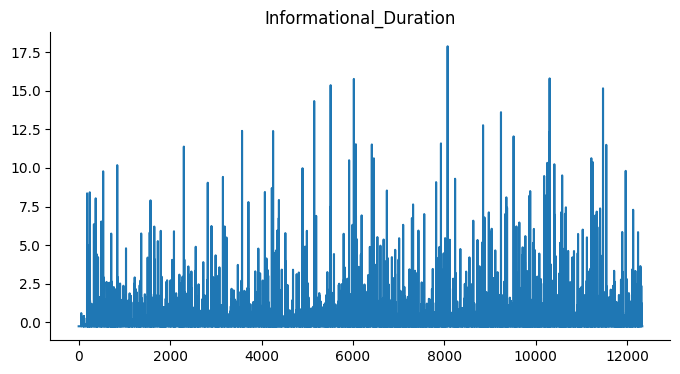

In [20]:
# @title Informational_Duration

from matplotlib import pyplot as plt
df['Informational_Duration'].plot(kind='line', figsize=(8, 4), title='Informational_Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


# Check data types
data_types = df.dtypes
print("\nData types:")
print(data_types)


Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

Outliers:
{'Administrative': 404, 'Administrative_Duration': 1172, 'Informational': 2631, 'Informational_Duration': 2405, 'ProductRelated': 987, 'ProductRelated_Duration': 961, 'BounceRates': 1551, 'ExitRates': 1099, 'PageValues': 2730, 'SpecialDay': 1251, 'Month': 0, 'OperatingSystems': 111, 'Browser': 4369, 'Region': 511, 'TrafficType': 2101}

Data types:
Administrative             float64
Administrative_Duration    float64
Informational              float64
Informationa

Missing Values: There are no missing values in any of the columns of your DataFrame, which is good.



Data Types: All columns seem to have appropriate data types. The numerical columns are of type float64, and the categorical column ('VisitorType') has been encoded as integers.



<ipython-input-10-14ec492d55a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Administrative_Duration', y='VisitorType', inner='box', palette='Dark2')


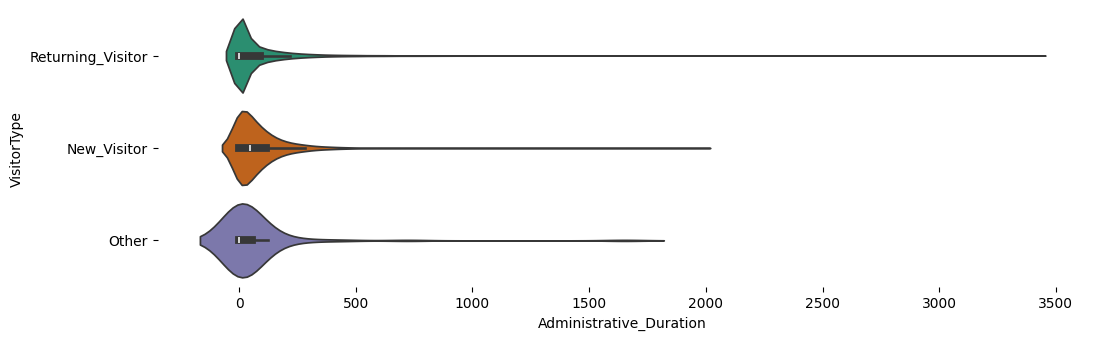

In [10]:
# @title VisitorType vs Administrative_Duration

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['VisitorType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Administrative_Duration', y='VisitorType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
df.describe(include='O')


,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('VisitorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Month'].value_counts()
    for x_label, grp in _df_3.groupby('index')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('index')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VisitorType'].value_counts()
    for x_label, grp in _df_4.groupby('Month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Month')
_ = plt.ylabel('VisitorType')

In [34]:
from sklearn.preprocessing import StandardScaler


# Mean encoding for categorical variables: 'Month', 'VisitorType'
mean_encoding_mapping = {}
for col in ['Month', 'VisitorType']:
    mean_encoding_mapping[col] = df.groupby(col)['Revenue'].mean()

for col in ['Month', 'VisitorType']:
    df[col] = df[col].map(mean_encoding_mapping[col])

# Binary encoding for 'Weekend' column
df['Weekend'] = df['Weekend'].astype(int)

# Drop the 'Revenue' column
df.drop(columns=['Revenue'], inplace=True)

# Scale numerical variables
scaler = StandardScaler()
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                     'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                     'SpecialDay']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the preprocessed DataFrame
print(df.head())


   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821  0.016304                 1   
1    -0.457683   1.171473   -0.317178   -0.308821 

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'VisitorType' column
label_encoder = LabelEncoder()
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

# Implement K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df)

# Implement Complete-Linkage Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='complete')
agglomerative_clusters = agglomerative.fit_predict(df)

# Calculate Rand Index for K-means clustering
kmeans_ri = adjusted_rand_score(df['VisitorType'], kmeans_clusters)

# Calculate Rand Index for Complete-Linkage Agglomerative clustering
agglomerative_ri = adjusted_rand_score(df['VisitorType'], agglomerative_clusters)

print("Rand Index for K-means clustering:", kmeans_ri)
print("Rand Index for Complete-Linkage Agglomerative clustering:", agglomerative_ri)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand Index for K-means clustering: 0.019810408079383477
Rand Index for Complete-Linkage Agglomerative clustering: 0.04234504238987801
